# Importing Libraries

- **Matplotlib**: Visual representation of the images 
- **NumPy**: Numerical computation of the model
- **Pandas**: Used for file handling
- **Seaborn**: Statistical graphics in Python
- **load_img**: Loads the image from the folder
- **img_to_array** : converts the loaded images to array to pass to the model

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images
- **picture_size** : standradizing  the picture size as 48 , so all trained set trains in a pic size of 48

In [ ]:
picture_size = 48
folder_path = r"C:\Users\Bargavan R\OneDrive\Desktop\OPENCV\cnn_example\Emotion_Detection_CNN-main\dataset\images"

In [43]:
print(os.path.exists(folder_path + r"\train\disgust"))

True


### Visvalization of Data set
 ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

🖼 plt.imshow(img)
This plots the image (img) to the current figure in Matplotlib.

Think of it as preparing the image for display.

But it does not actually display the image on screen by itself.

✅ plt.show()
This renders and displays all the plots/images that have been prepared (like with plt.imshow()).

Without plt.show(), the image might not appear, especially in non-interactive environments (like scripts or terminals).

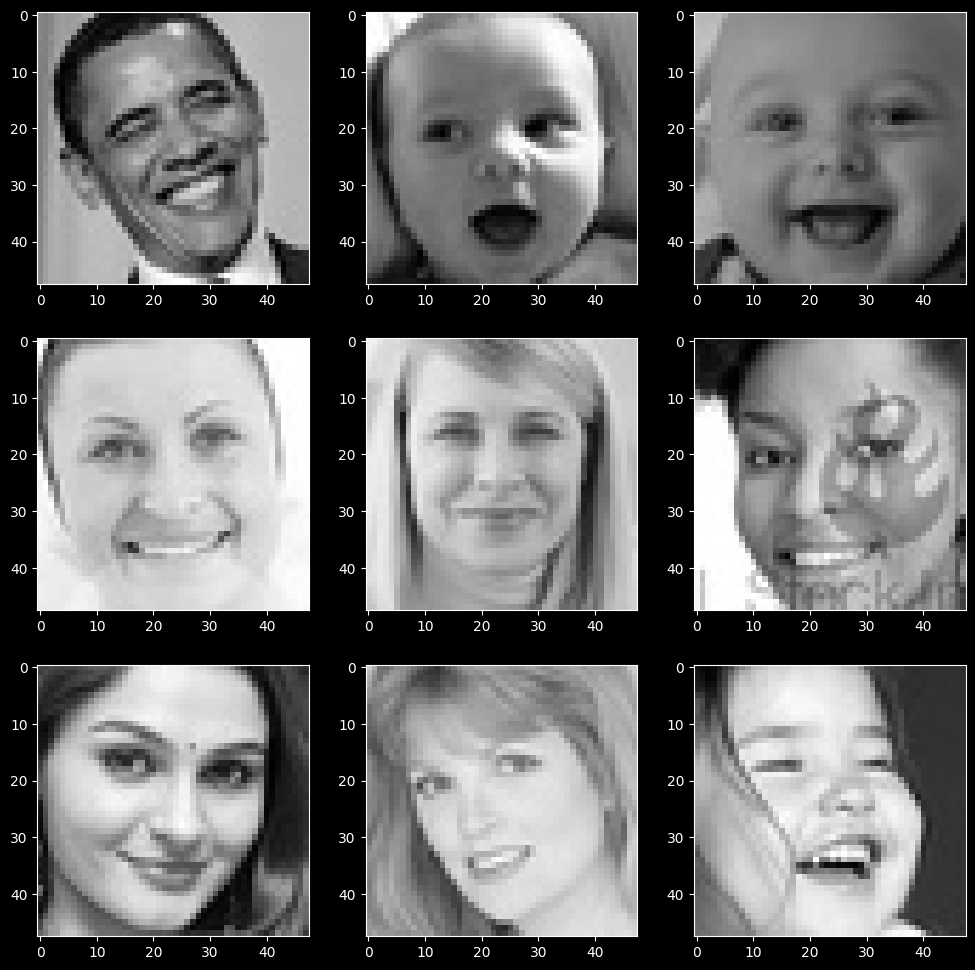

In [ ]:
expression = r'disgust'

plt.figure(figsize= (12,12)) #fig size to show 
for i in range(1, 10):
    plt.subplot(3, 3, i) # i determines the position of the img
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data

In [ ]:
batch_size  = 128 
# Batch size determines that how many examples files it should take in one iteration

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(os.path.join(folder_path+r"\train"),
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(os.path.join(folder_path+r"\validation"),
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [ ]:
no_of_classes = 7 # 7 different possible outcomes 

model = Sequential() # 👉 Initializes a sequential model. That means layers are added one after the other 

#1st CNN layer
#pooling = Sum of all the filters
#Conv2D(64, (3,3)): 64 filters, each of size 3x3.
# padding =  Output size = input size (with padding)
# input_shape=(48,48,1): Input is 48x48 grayscale (1 channel) images.  

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization()) #Normalizes the activations of the previous layer, speeding up training and improving stability.
model.add(Activation('relu')) #Adds non-linearity. ReLU sets negative values to 0. Helps the model learn complex features. "rectified linear"
# it wont process all the neurons at the same time .
#tells which data need to pair up with the next layer 
model.add(MaxPooling2D(pool_size = (2,2)))   ##Extracts the feature at the particular part of the image . 
model.add(Dropout(0.25))  #prevents our model for overfitting 

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Converts the 3D output from Conv layers to a 1D vector — so it can be used in dense layers.

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#A dense layer is connected deeply with preceding layers in any neural network

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

#Final layer with 7 neurons (because no_of_classes = 7)
#softmax activation gives probabilities for each class — sums to 1.



opt = Adam(learning_rate=  0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

d:\anaconda\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Fitting the Model with Training and Validation Data 

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#reduces LR on pattern kinda checkpost 
checkpoint = ModelCheckpoint(r"C:\Users\Bargavan R\OneDrive\Desktop\OPENCV\cnn_example\Emotion_Detection_CNN-main/model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#save_best_only=True appends only if the acc increases
'''verbose=1
Controls logging:

0 = silent

1 = prints a message each time the model is saved

2 = prints less info
mode='max'
pecifies how the monitored value is evaluated:

'max' → higher is better (for accuracy)

'min' → lower is better (for loss)

'auto' → automatically infers based on metric name
'''
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

Early stoppin Parameters:
🔍 monitor='val_loss'
Watches the validation loss during training.

You can also monitor val_accuracy, loss, etc.

⚠ min_delta=0
Minimum change in monitored metric to be considered an improvement.

0 means any decrease in val_loss is treated as an improvement.

⏳ patience=3
Number of epochs to wait after no improvement before stopping.

E.g., if validation loss doesn't improve for 3 consecutive epochs, training stops.

📢 verbose=1
Prints a message when stopping early.

0 = silent mode

🧠 restore_best_weights=True
After stopping, restores the model weights from the epoch with the best monitored value (lowest val_loss here).

Helps prevent overfitting at the end of training.

🧩 reduce_learningrate Parameters:
🔍 monitor='val_loss'
Watches validation loss again.

🔽 factor=0.2
The learning rate is multiplied by this factor when no improvement is seen.

Example: if current LR = 0.001 → next LR = 0.001 × 0.2 = 0.0002

⏳ patience=3
Waits 3 epochs with no improvement before reducing the LR.

📢 verbose=1
Prints a message when learning rate is reduced.

⚠ min_delta=0.0001
A change less than 0.0001 in the monitored value is not considered an improvement.

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
#step size is , how many files i need to take in per iteration 

d:\anaconda\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 117s 508ms/step - accuracy: 0.2688 - loss: 1.9210 - val_accuracy: 0.3724 - val_loss: 1.6426 - learning_rate: 0.0010
Epoch 2/48


d:\anaconda\envs\myenv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 1:40 449ms/step - accuracy: 0.3906 - loss: 1.5291

d:\anaconda\envs\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.3906 - loss: 1.5291 - val_accuracy: 0.3668 - val_loss: 1.7390 - learning_rate: 0.0010
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 111s 493ms/step - accuracy: 0.4437 - loss: 1.4541 - val_accuracy: 0.3827 - val_loss: 1.5804 - learning_rate: 0.0010
Epoch 4/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.4922 - loss: 1.2532 - val_accuracy: 0.4136 - val_loss: 1.5326 - learning_rate: 0.0010
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 106s 471ms/step - accuracy: 0.5119 - loss: 1.2724 - val_accuracy: 0.5122 - val_loss: 1.2526 - learning_rate: 0.0010
Epoch 6/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5000 - loss: 1.1921 - val_accuracy: 0.5115 - val_loss: 1.2526 - learning_rate: 0.0010
Epoch 7/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 110s 491ms/step - accuracy: 0.5419 - loss: 1.1999 - val_accuracy: 0.4852 - val_loss: 1.3219 - learning_rate: 0.0010
Epoch 8/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 1:46 475ms/step - accuracy: 0.6016 - loss: 1

# Plotting Accuracy & Loss

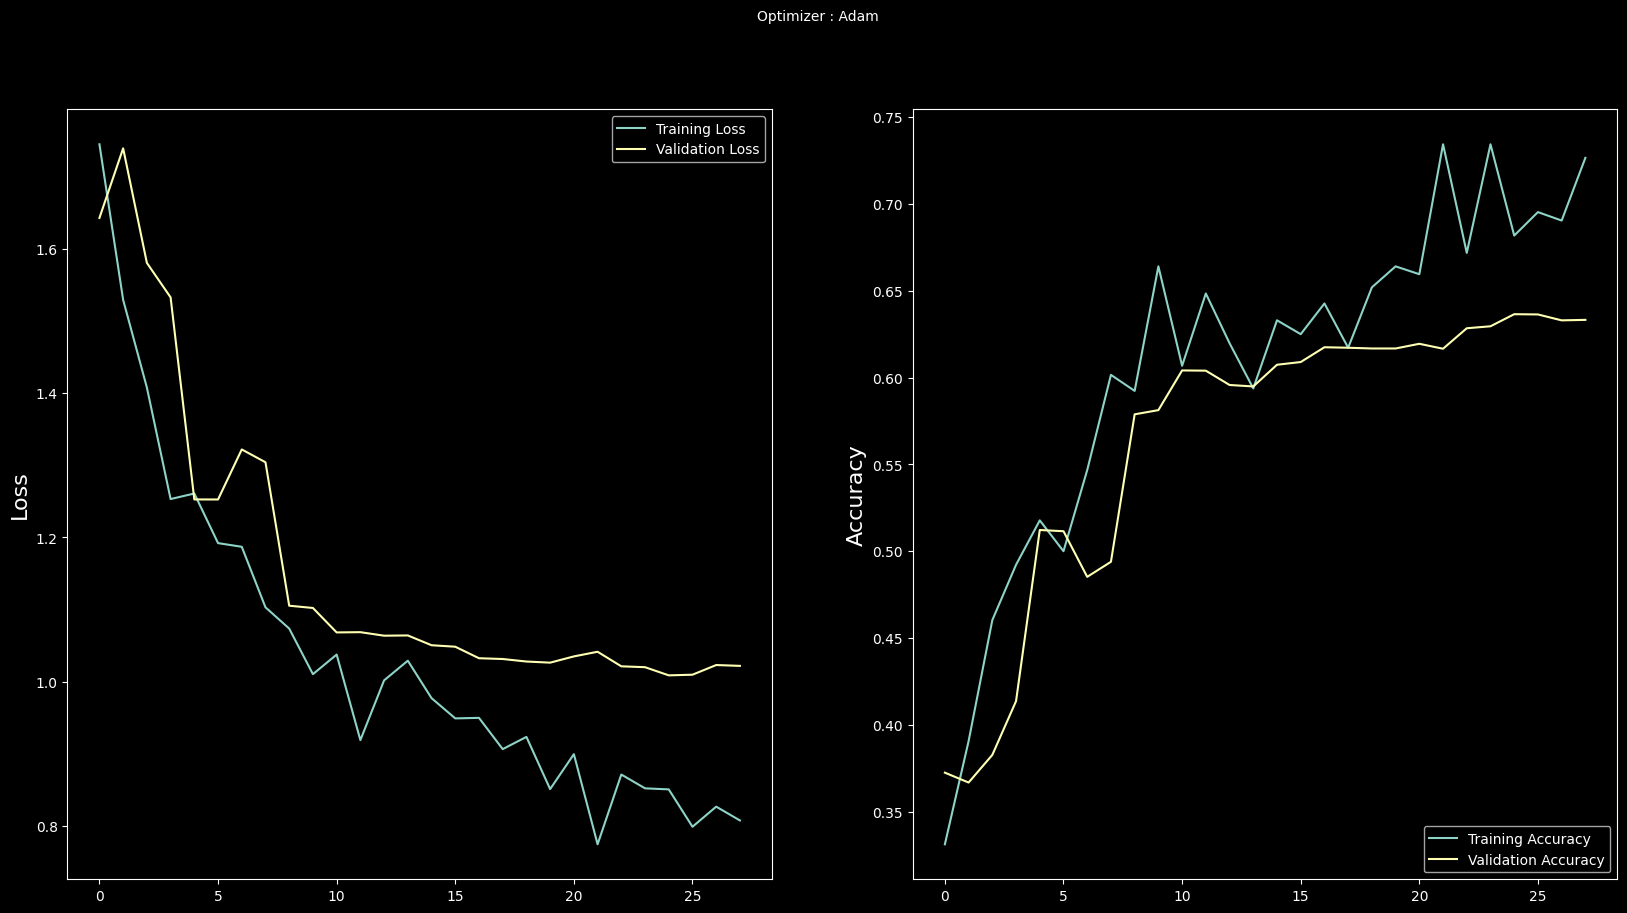

In [51]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()